# King County House Price Analysis 

In [65]:
# import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from ipyleaflet import Map, basemaps, basemap_to_tiles, CircleMarker, LayerGroup

## First Data Exploration

In [66]:
# read data
house_sales_df = pd.read_csv("King_County_House_prices_dataset.csv")
# column names
print("column names:")
print(house_sales_df.columns)
# number of observations and columns
print("number of observations and columns:")
print(house_sales_df.shape)
house_sales_df.head()

column names:
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
number of observations and columns:
(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [67]:
house_sales_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [68]:
# What data type are the entries and are there missing values?
house_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Analyse the "price" variable (prediction variable)

Unique price values:
[221900. 538000. 180000. ... 541800. 610685. 402101.]


(0, 50)

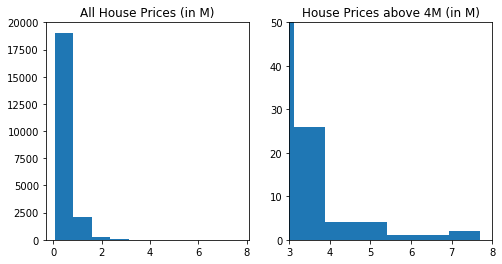

In [69]:
print("Unique price values:")
print(house_sales_df["price"].unique())
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].hist(house_sales_df["price"]/1000000) #prices in million $
ax[0].set_title("All House Prices (in M)")
ax[1].hist(house_sales_df["price"]/1000000)
ax[1].set_title("House Prices above 4M (in M)")
plt.xlim(3,8)
plt.ylim(0,50)
#plt.savefig('price_hist.jpg', dpi=300)

Observations:

* Most price lie between 0 and 4.000.0000
* Only few very high price

# General Data Cleaning

In [70]:
house_sales_df_cp = house_sales_df # generate a copy of the dataframe

### Delete very expensive houses (>4M)

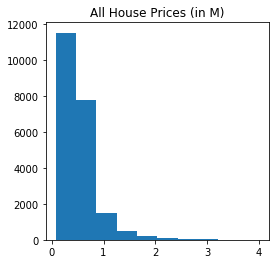

In [71]:
idx = house_sales_df.index[house_sales_df_cp["price"] > 4000000]
house_sales_df_cp.drop(index=idx,inplace=True)
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(house_sales_df_cp["price"]/1000000)
ax.set_title("All House Prices (in M)");
#plt.savefig('price_hist_lower4M.jpg', dpi=300)

In [72]:
house_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21586 entries, 0 to 21596
Data columns (total 21 columns):
id               21586 non-null int64
date             21586 non-null object
price            21586 non-null float64
bedrooms         21586 non-null int64
bathrooms        21586 non-null float64
sqft_living      21586 non-null int64
sqft_lot         21586 non-null int64
floors           21586 non-null float64
waterfront       19210 non-null float64
view             21524 non-null float64
condition        21586 non-null int64
grade            21586 non-null int64
sqft_above       21586 non-null int64
sqft_basement    21586 non-null object
yr_built         21586 non-null int64
yr_renovated     17745 non-null float64
zipcode          21586 non-null int64
lat              21586 non-null float64
long             21586 non-null float64
sqft_living15    21586 non-null int64
sqft_lot15       21586 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


### Missing Values

The following columns contain missing values:

* waterfront 21586 - 19210 = 2376 missing values (= 11% of the observations)
* view 21586 - 21524 = 62 missing values (0.3% of the observations)
* yr_renovated 21586 - 17745 = 3841 missing values (17.8% of the observations)

Have a closer look at these features. Which values do they take?

In [73]:
print("waterfront values")
print(house_sales_df["waterfront"].unique())
print("view values")
print(house_sales_df["view"].unique())
print("yr_renovated values")
print(house_sales_df["yr_renovated"].unique())

waterfront values
[nan  0.  1.]
view values
[ 0. nan  3.  4.  2.  1.]
yr_renovated values
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


How do we treat the missing values?
* Waterfront - House which has a view to a waterfront: Variable takes two possible values (0: no waterfront view, 1 waterfrot view), we can assume that a missing value in this variable means the house has no view to the waterfront, that is nan-values are set to 0
* view - How is the view, only few missing values, delete observation with missing values
* yr_renovated - Year when house was renovated: contains either the year in which it was renovated or 0, we can assume that nan means, that the house has not been renovated, that is nan can be replaced by 0

In [74]:
house_sales_df_cp["waterfront"].fillna(0,inplace=True)
house_sales_df_cp["yr_renovated"].fillna(0,inplace=True)
house_sales_df_cp.dropna(0,inplace=True)
house_sales_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21596
Data columns (total 21 columns):
id               21524 non-null int64
date             21524 non-null object
price            21524 non-null float64
bedrooms         21524 non-null int64
bathrooms        21524 non-null float64
sqft_living      21524 non-null int64
sqft_lot         21524 non-null int64
floors           21524 non-null float64
waterfront       21524 non-null float64
view             21524 non-null float64
condition        21524 non-null int64
grade            21524 non-null int64
sqft_above       21524 non-null int64
sqft_basement    21524 non-null object
yr_built         21524 non-null int64
yr_renovated     21524 non-null float64
zipcode          21524 non-null int64
lat              21524 non-null float64
long             21524 non-null float64
sqft_living15    21524 non-null int64
sqft_lot15       21524 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


### Drop variables that are not interesting for the price prediction:
* id - unique identified for a house
* date - house was sold

In [75]:
house_sales_df_cp.drop(["id","date"],axis=1, inplace=True)

### Explore the remaining variables:

In [76]:
house_sales_df_cp.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [77]:
## bedrooms and bathrooms
print("bedrooms unique")
print(house_sales_df_cp["bedrooms"].unique())
print("bathrooms unique")
print(house_sales_df_cp["bathrooms"].unique())

bedrooms unique
[ 3  2  4  5  1  6  7  8  9 11 10 33]
bathrooms unique
[1.   2.25 3.   2.   4.5  2.5  1.75 2.75 1.5  3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 0.5  5.5  5.25 6.75 6.   5.75 7.5  8.   6.25 6.5 ]


Observations: 

* The variable bedrooms seems to have an outlier -> value 33
* Make a scatter plot between price and bedrooms and a boxplot of bedrooms

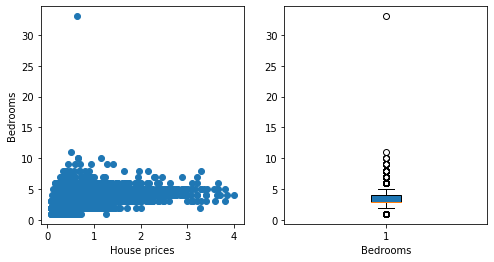

In [78]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].scatter(house_sales_df_cp["price"]/1000000,house_sales_df_cp["bedrooms"])
ax[0].set_xlabel("House prices")
ax[0].set_ylabel("Bedrooms")
ax[1].boxplot(house_sales_df_cp["bedrooms"],patch_artist=True)
ax[1].set_xlabel("Bedrooms");

Observations:

* The assumption of the outlier is confirmed. Delete the observation with 33 bedrooms

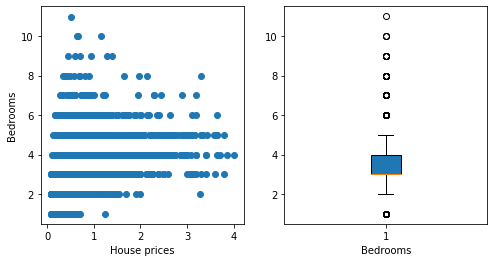

In [79]:
idx = house_sales_df_cp.index[house_sales_df_cp["bedrooms"] == 33]
house_sales_df_cp.drop(index=idx,inplace=True)

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].scatter(house_sales_df_cp["price"]/1000000,house_sales_df_cp["bedrooms"])
ax[0].set_xlabel("House prices")
ax[0].set_ylabel("Bedrooms")
ax[1].boxplot(house_sales_df_cp["bedrooms"],patch_artist=True)
ax[1].set_xlabel("Bedrooms");

In [80]:
# area measures
print("sqft_lot unique")
print(house_sales_df_cp["sqft_lot"].unique())
print("sqft_living")
print(house_sales_df_cp["sqft_living"].unique())
print("sqft_above unique")
print(house_sales_df_cp["sqft_above"].unique())
print("sqft_basement unique")
print(house_sales_df_cp["sqft_basement"].unique())
print("sqft_living15 unique")
print(house_sales_df_cp["sqft_living15"].unique())
print("sqft_lot15 unique")
print(house_sales_df_cp["sqft_lot15"].unique())

sqft_lot unique
[ 5650  7242 10000 ...  5813  2388  1076]
sqft_living
[1180 2570  770 ... 3087 3118 1425]
sqft_above unique
[1180 2170  770 1050 1680 3890 1715 1890 1860  860 1430 1370 1810 1980
 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320 1190
 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990 2290
 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540 1110
 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010  960
 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460 1170
 1240 3140 2030 2310  700 1080 2780 1560 1450 1720 2910 1620 1360 1060
 2460 1390 2140 1320 1340 1550  940 1380 3670 2370 1130  980 3540 2500
 1760 1030 1780 3400 2680 1670 2590  820 1220 2440 2090 1100 1330 1420
 1690 2150 1910 1350 1940  900 2714  850 1870 1950 2760 2020 1120 1480
 1230 2280 3760 3530  830 1300 2740 1830  720 2010 3360  800 1730  760
 1700 4750 5310  580 2653 2850 2210 2630 3500 1740 1140 2160 2650  970
 2040 2180 2220 1660 337

Observations:

* sqft_basement has entry "?" for at least one observation
* sqft_basement contains strings
* Dependency: sqft_living = sqft_above + sqft_basement

-> drop sqft_basement (because of dependency)

In [81]:
house_sales_df_cp.drop(["sqft_basement"],axis=1, inplace=True)
house_sales_df_cp.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [82]:
# location
print("zipcode unique")
print(house_sales_df_cp["zipcode"].unique())
print("lat unique")
print(house_sales_df_cp["lat"].unique())
print("long unique")
print(house_sales_df_cp["long"].unique())

zipcode unique
[98178 98125 98028 98136 98074 98053 98003 98146 98038 98007 98115 98107
 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052 98027
 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008 98059
 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032 98045
 98102 98077 98198 98108 98168 98177 98029 98006 98109 98022 98033 98155
 98024 98011 98031 98106 98072 98188 98065 98014 98055 98039]
lat unique
[47.5112 47.721  47.7379 ... 47.3906 47.3339 47.6502]
long unique
[-122.257 -122.319 -122.233 -122.393 -122.045 -122.005 -122.327 -122.337
 -122.031 -122.145 -122.292 -122.229 -122.394 -122.375 -121.962 -122.343
 -122.21  -122.306 -122.341 -122.169 -122.166 -122.172 -122.218 -122.36
 -122.314 -122.304 -122.11  -122.07  -122.357 -122.368 -122.157 -122.31
 -122.132 -122.362 -122.282 -122.18  -122.027 -122.347 -122.016 -122.364
 -122.175 -121.977 -122.371 -122.151 -122.301 -122.451 -122.322 -122.189
 -122.384 -122.369 -122.281 -122.29  -122.114

In [23]:
# Plot Price depending on locations 
# radius is proportional to price rounded to Millions
df_lonlat = house_sales_df_cp[["long","lat","price"]]
m = Map(center = (47.5, -122.3), zoom = 10, basemaps = basemaps.OpenStreetMap.DE)
def create_marker(df_lonlat):
   lat_lon = (df_lonlat["lat"], df_lonlat["long"])
   size = int(round(df_lonlat['price']/1000000)) 
   return CircleMarker(location=lat_lon, draggable=False, radius=size, fill_opacity=0.5,stroke=False,scroll_wheel_zoom=True)

markers = df_lonlat.apply(create_marker, axis=1)
layer_group = LayerGroup(layers=tuple(markers.values))
m.add_layer(layer_group)
m

Map(center=[47.5, -122.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [83]:
# remaining variables
print("view unique")
print(house_sales_df_cp["view"].unique())
print("floors unique")
print(house_sales_df_cp["floors"].unique())
print("waterfront unique")
print(house_sales_df_cp["waterfront"].unique())
print("condition unique")
print(house_sales_df_cp["condition"].unique())
print("grade unique")
print(house_sales_df_cp["grade"].unique())
print("yr_built unique")
print(house_sales_df_cp["yr_built"].unique())
print("yr_renovated unique")
print(house_sales_df_cp["yr_renovated"].unique())


view unique
[0. 3. 4. 2. 1.]
floors unique
[1.  2.  1.5 3.  2.5 3.5]
waterfront unique
[0. 1.]
condition unique
[3 5 4 1 2]
grade unique
[ 7  6  8 11  9  5 10 12  4  3 13]
yr_built unique
[1955 1951 1933 1965 1987 2001 1995 1960 2003 1942 1927 1977 1900 1979
 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929 1981
 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991 1954
 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988 1962
 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924 1990
 1914 1926 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943 1957 2004
 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1963 1998 1913 2013
 1907 1958 2012 1912 2011 1932 1944 1902 2009 1903 1970 2015 1934 1938
 1919 1917 1906 1935]
yr_renovated unique
[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1

Have a closer look at waterfront

In [84]:
print(house_sales_df_cp[house_sales_df_cp["waterfront"]==1]['price'].count())
print(house_sales_df_cp[house_sales_df_cp["waterfront"]==0]['price'].count())
print(141/21382)

141
21382
0.006594331680853054


Observations:

* Only very few houses are at the waterfront compared to entire dataset

### drop some variables, that are not interesting for us: 

* lat, long (go together with zipcode)
* condition (does not seem to cary information), a value for grading the house is given in "grade"
* waterfront (only very few houses have this variable set to 1) 

In [85]:
house_sales_df_cp.drop(["lat","long","condition","waterfront"],axis=1, inplace=True)

# Business Case

### Goal: Predict House Prices

* King county is a bg area, which is not homogenous: Seattle (big city) vs. mountains
* Can we use the same model for predicting house prices in King County or do we need to adopt the model depending on the region?

### King County can be divided in 4 regions: North, South, East and Seattle 

* based on (https://www.kingcounty.gov/depts/health/data/community-health-indicators/definitions.aspx)
* North Region: Bothell, Cottage Lake, Kenmore, Lake Forest Park, Shoreline, Woodinville, Fall City
* East Region: Bellevue, Carnation, Duvall, Issaquah, Kirkland, Medina, Mercer Island, Newcastle, North Bend, Redmond, Sammamish, Skykomish, Snoqualmie 
* South region: Auburn, Burien, Covington, Des Moines, Enumclaw, Federal Way, Kent, Maple Valley, Normandy Park, Renton, Tukwila, SeaTac, White Center/Boulevard Park, Vashon Island, Black Diamond

### Question: Is the model needed for the prediction depending on the region?

* Do we need different features for the model?
* Do we need to adapt the coefficients for each region?


### Create 4 regions, depending on the zipcode

* region of the zipcode is based on https://www.zipmap.net/Washington/King_County.htm





In [86]:
# create regions depending on zipcodes
North = [98028, 98077, 98024, 98011, 98072]
Seattle = [98178, 98125, 98136, 98198, 98146, 98115, 98107, 98126, 98103, 98133, 98119, 98112, 98117, 98166, 98148, 98105, 98122, 98144, 98116, 98118, 98199, 98102, 98108, 98168, 98177, 98109, 98155, 98106, 98188]
East = [98074, 98053, 98007, 98019, 98040, 98052, 98027, 98008, 98004, 98005, 98034, 98075, 98045, 98065, 98029, 98006, 98006, 98033, 98014, 98039]
South = [98003, 98038, 98002, 98092, 98030, 98058, 98001, 98056, 98023, 98070, 98042, 98059, 98010, 98032, 98022, 98031, 98055]

### Create 4 sub dataframes depending on the regions

In [87]:
north_df = house_sales_df_cp[house_sales_df_cp['zipcode'].isin(North)]
seattle_df = house_sales_df_cp[house_sales_df_cp['zipcode'].isin(Seattle)]
east_df = house_sales_df_cp[house_sales_df_cp['zipcode'].isin(East)]
south_df = house_sales_df_cp[house_sales_df_cp['zipcode'].isin(South)]

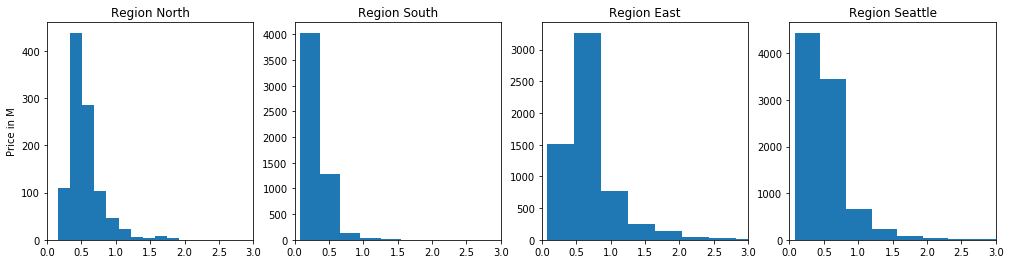

In [89]:
# Distribution of the house prices depending on the region
fig, ax = plt.subplots(1,4, figsize=(17,4))
ax[0].hist(north_df["price"]/1000000)
ax[0].set_title("Region North")
ax[0].set_xlim(0,3)
ax[0].set_ylabel("Price in M")
ax[1].hist(south_df["price"]/1000000)
ax[1].set_title("Region South")
ax[1].set_xlim(0,3)
ax[2].hist(east_df["price"]/1000000)
ax[2].set_title("Region East")
ax[2].set_xlim(0,3)
ax[3].hist(seattle_df["price"]/1000000)
ax[3].set_title("Region Seattle")
ax[3].set_xlim(0,3);
#plt.savefig('price_hist_regions.jpg', dpi=300)

### Create Heatmaps of correlations for each of the 4 regions and the entire dataset 

(21523, 14)

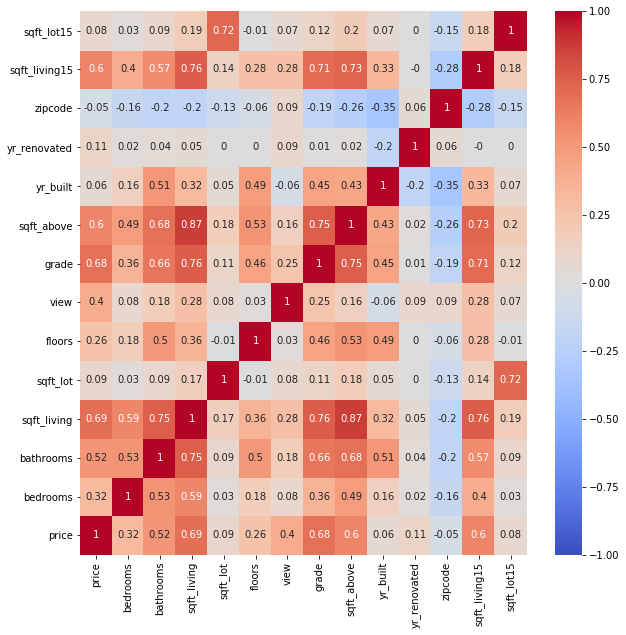

In [90]:
fig, ax = plt.subplots(figsize=(10,10))
#mask = np.triu(df_high_corr.corr())
ax = sns.heatmap(round(house_sales_df_cp.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,14))
#plt.savefig('heat_corr_house_sales_tot.jpg', dpi=300)
house_sales_df_cp.shape

(1024, 14)

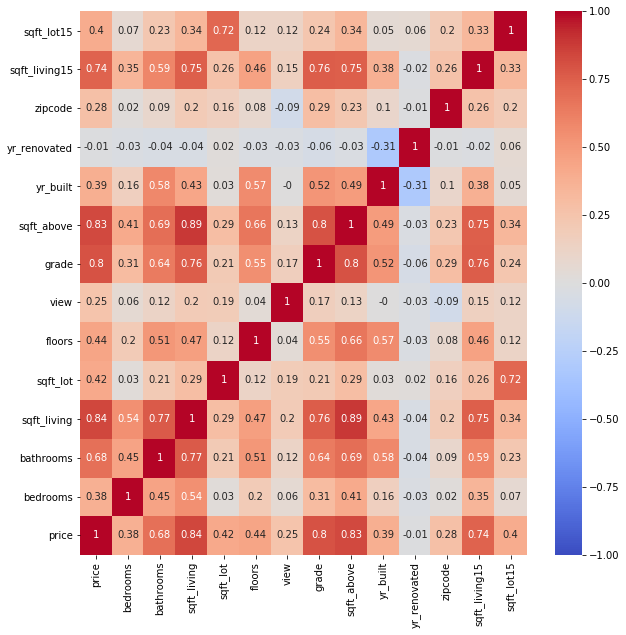

In [91]:
fig, ax = plt.subplots(figsize=(10,10))
#mask = np.triu(df_high_corr.corr())
ax = sns.heatmap(round(north_df.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,14))
north_df.shape

(5508, 14)

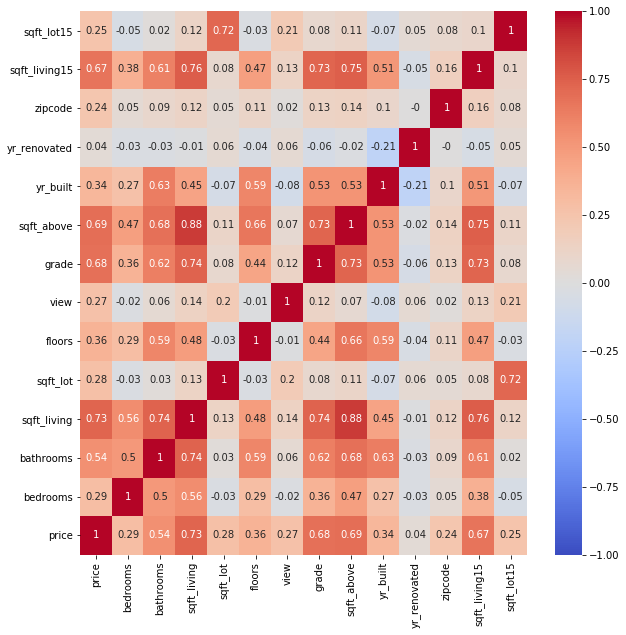

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
#mask = np.triu(df_high_corr.corr())
ax = sns.heatmap(round(south_df.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,14))
south_df.shape

(6048, 14)

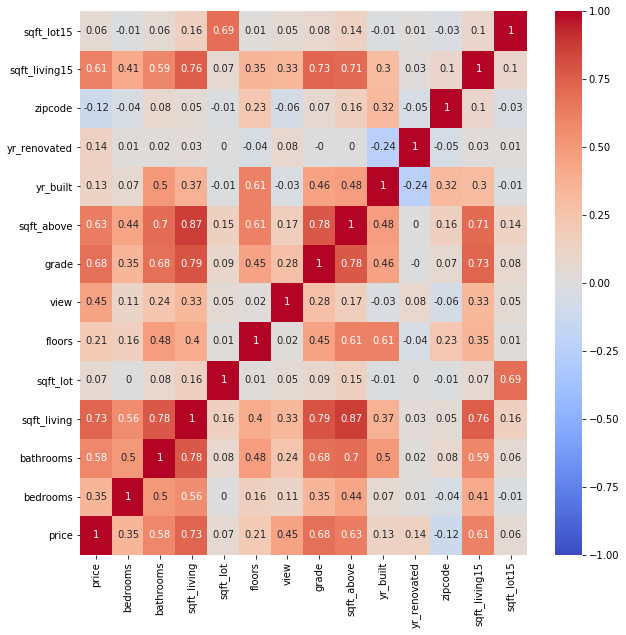

In [93]:
fig, ax = plt.subplots(figsize=(10,10))
#mask = np.triu(df_high_corr.corr())
ax = sns.heatmap(round(east_df.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,14))
east_df.shape

(8943, 14)

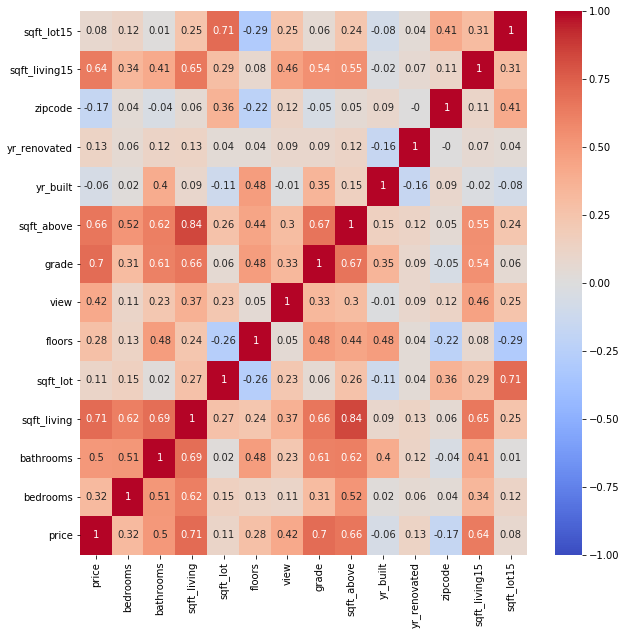

In [94]:
fig, ax = plt.subplots(figsize=(10,10))
#mask = np.triu(df_high_corr.corr())
ax = sns.heatmap(round(seattle_df.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,14))
seattle_df.shape

Observations:
    
* Number of observations in each sub-dataframe differ: 
  * Total: 21585
  * North: 1029
  * South: 5527
  * East: 6059
  * Seattle: 8970
* Features with highest correlations with Price (>0.5):
  * Total: bathrooms (0.52), sqft_living (0.69), grade (0.68), sqft_above (0.6), sqft_living15 (0.6)
  * North: bathrooms (0.68), sqft_living (0.84), grade (0.8), sqft_above (0.83), sqft_living15 (0.74)
  * South: bathrooms (0.54), sqft_living (0.74), grade (0.68), sqft_above (0.69), sqft_living15 (0.67)
  * East: bathrooms (0.58), sqft_living (0.73), grade (0.68), sqft_above (0.63), sqft_living15 (0.61) 
  * Seattle: bathrooms (0.51), sqft_living (0.71), grade (0.7), sqft_above (0.66), sqft_living15 (0.64)
* Colinearity (within the above features):
  * sqft_living and sqft_above have high correlation, cannot be considered as linear independend
  * In general these features are also correlated with each other and have to be considered carefully in a linear regression
* The features with highes correlations with the price are the same for each region, but correlations differ, especially for the region North
* __NOTE__: Be careful with categorical variables! The variables with correlaion >0.5 are all numerical, except grade. The feature grade will be considered seperately later  

Have a closer look at the (numerical) features with high (>0.5) correlations

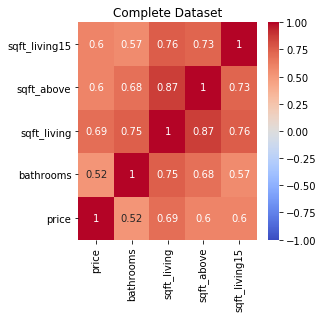

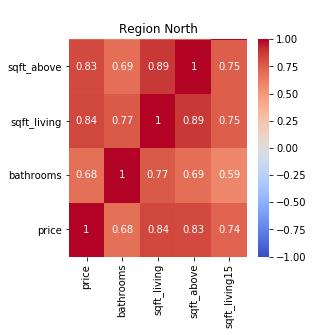

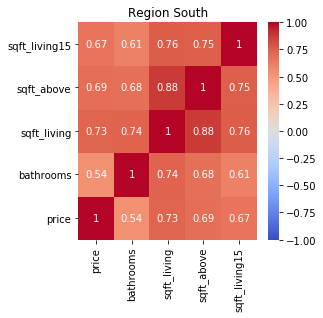

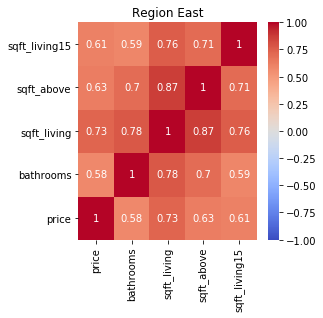

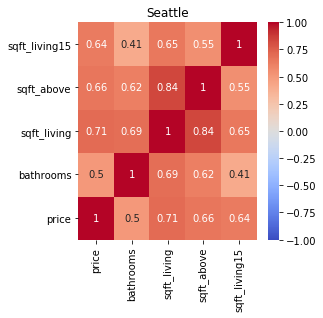

In [95]:
df_high_corr_tot = house_sales_df_cp[["price","bathrooms","sqft_living","sqft_above","sqft_living15"]]
df_high_corr_north = north_df[["price","bathrooms","sqft_living","sqft_above","sqft_living15"]]
df_high_corr_south = south_df[["price","bathrooms","sqft_living","sqft_above","sqft_living15"]]
df_high_corr_east = east_df[["price","bathrooms","sqft_living","sqft_above","sqft_living15"]]
df_high_corr_seattle = seattle_df[["price","bathrooms","sqft_living","sqft_above","sqft_living15"]]

fig, ax = plt.subplots(figsize=(4,4))
#mask = np.triu(df_high_corr.corr())
sns.heatmap(round(df_high_corr_tot.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,5))
ax.set_title("Complete Dataset")
#plt.savefig('heat_corr_house_sales_tot_highcorr.jpg', dpi=300)

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(round(df_high_corr_north.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,4))
ax.set_title("Region North")

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(round(df_high_corr_south.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,5))
ax.set_title("Region South")

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(round(df_high_corr_east.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,5))
ax.set_title("Region East")

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(round(df_high_corr_seattle.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,5))
ax.set_title("Seattle");

Observation:
* As noted above all these features are correlated among each other 

# A first simple model

As a first step towards price prediction perform a simple linear regression with the feature that shows highest correltation (sqft_living)

### Create train and test sets for the complete dataset (all regions together)

In [96]:
# create training and testing vars
X_tot = house_sales_df_cp[["sqft_living"]]
y_tot = house_sales_df_cp["price"]/1000000
X_tot_train, X_tot_test, y_tot_train, y_tot_test = train_test_split(X_tot, y_tot, test_size=0.2)
print("Train set length (x,y)")
print(X_tot_train.shape, y_tot_train.shape)
print("Test set length (x,y)")
print(X_tot_test.shape, y_tot_test.shape)

Train set length (x,y)
(17218, 1) (17218,)
Test set length (x,y)
(4305, 1) (4305,)


### Fit the model for the complete dataset 

In [97]:
# fit a model
lm = linear_model.LinearRegression()
model_tot = lm.fit(X_tot_train, y_tot_train)
predictions_tot = lm.predict(X_tot_test)

### Plot model results vs. real values for the complete dataset

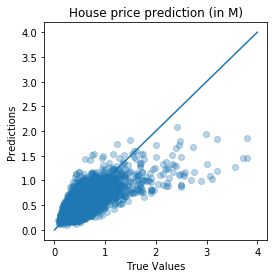

In [98]:
## The line / model
fig, ax = plt.subplots(figsize=(4,4))
plt.scatter(y_tot_test, predictions_tot, alpha=0.3)
x = np.linspace(0,4,100)
y = np.linspace(0,4,100)
ax.plot(x,y)
ax.set_title("House price prediction (in M)")
plt.xlabel("True Values")
plt.ylabel("Predictions");

Observations: 

* A general underestimation can be seen
* Use a logarithmic transformation for target and features
* Repeat the above model with logarthmic transformation

Train set length (x,y)
(17218, 1) (17218,)
Test set length (x,y)
(4305, 1) (4305,)


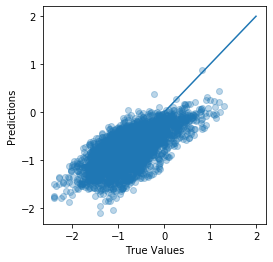

In [99]:
# linear regression with logarithmic transformation
# model with only one independend variable, with highest correlation
X = house_sales_df_cp[["sqft_living"]]
y = house_sales_df_cp["price"]/1000000
ln_y = np.log(y)
ln_X = np.log(X)
X_tot_ln_train, X_tot_ln_test, y_tot_ln_train, y_tot_ln_test = train_test_split(ln_X, ln_y, test_size=0.2)
print("Train set length (x,y)")
print(X_tot_ln_train.shape, y_tot_ln_train.shape)
print("Test set length (x,y)")
print(X_tot_ln_test.shape, y_tot_ln_test.shape)
# fit a model
lm = linear_model.LinearRegression()
model_tot_ln = lm.fit(X_tot_ln_train, y_tot_ln_train)
predictions_tot_ln = lm.predict(X_tot_ln_test)
## The line / model
fig, ax = plt.subplots(figsize=(4,4))
plt.scatter(y_tot_ln_test, predictions_tot_ln, alpha=0.3)
x = np.linspace(0,2,100)
y = np.linspace(0,2,100)
ax.plot(x,y)
plt.xlabel("True Values")
plt.ylabel("Predictions");

### Consider the residuals

* Compare the residuals of the two linear regressions above (with and without logarithmic transformation)

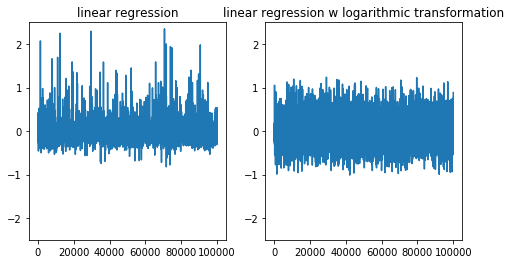

In [100]:
fig, ax = plt.subplots(2,1,figsize=(12,4))
residuals_tot = y_tot_test - predictions_tot
residuals_tot_ln = y_tot_ln_test - predictions_tot_ln
x = np.linspace(0,100000,4305)
plt.subplot(131)
plt.plot(x,residuals_tot)
plt.ylim(-2.5,2.5)
plt.title("linear regression")
plt.subplot(132)
plt.plot(x,residuals_tot_ln)
plt.title("linear regression w logarithmic transformation")
plt.ylim(-2.5,2.5);

Observations: 

* The fit is better using logarithmic transformation, bias is reduced
* The residuals look more like white noise

-> Keep the logarithmic transformation

### Perform this regression for the 4 regions

In [101]:
# Train/ Test sets
X_north = north_df[["sqft_living"]]
y_north = north_df["price"]/1000000
ln_y_north = np.log(y_north)
ln_X_north = np.log(X_north)
X_north_ln_train, X_north_ln_test, y_north_ln_train, y_north_ln_test = train_test_split(ln_X_north, ln_y_north, test_size=0.2)
print("Train set length North (x,y)")
print(X_north_ln_train.shape, y_north_ln_train.shape)
print("Test set length North (x,y)")
print(X_north_ln_test.shape, y_north_ln_test.shape)

X_south = south_df[["sqft_living"]]
y_south = south_df["price"]/1000000
ln_y_south = np.log(y_south)
ln_X_south = np.log(X_south)
X_south_ln_train, X_south_ln_test, y_south_ln_train, y_south_ln_test = train_test_split(ln_X_south, ln_y_south, test_size=0.2)
print("Train set length South (x,y)")
print(X_south_ln_train.shape, y_south_ln_train.shape)
print("Test set length South (x,y)")
print(X_south_ln_test.shape, y_south_ln_test.shape)

X_east = east_df[["sqft_living"]]
y_east = east_df["price"]/1000000
ln_y_east = np.log(y_east)
ln_X_east = np.log(X_east)
X_east_ln_train, X_east_ln_test, y_east_ln_train, y_east_ln_test = train_test_split(ln_X_east, ln_y_east, test_size=0.2)
print("Train set length East (x,y)")
print(X_east_ln_train.shape, y_east_ln_train.shape)
print("Test set length East (x,y)")
print(X_east_ln_test.shape, y_east_ln_test.shape)

X_seattle = seattle_df[["sqft_living"]]
y_seattle = seattle_df["price"]/1000000
ln_y_seattle = np.log(y_seattle)
ln_X_seattle = np.log(X_seattle)
X_seattle_ln_train, X_seattle_ln_test, y_seattle_ln_train, y_seattle_ln_test = train_test_split(ln_X_seattle, ln_y_seattle, test_size=0.2)
print("Train set length Seattle (x,y)")
print(X_seattle_ln_train.shape, y_seattle_ln_train.shape)
print("Test set length Seattle (x,y)")
print(X_seattle_ln_test.shape, y_seattle_ln_test.shape)


# fit a model
lm = linear_model.LinearRegression()
model_north_ln = lm.fit(X_north_ln_train, y_north_ln_train)
predictions_north_ln = lm.predict(X_north_ln_test)

lm = linear_model.LinearRegression()
model_south_ln = lm.fit(X_south_ln_train, y_south_ln_train)
predictions_south_ln = lm.predict(X_south_ln_test)

lm = linear_model.LinearRegression()
model_east_ln = lm.fit(X_east_ln_train, y_east_ln_train)
predictions_east_ln = lm.predict(X_east_ln_test)

lm = linear_model.LinearRegression()
model_seattle_ln = lm.fit(X_seattle_ln_train, y_seattle_ln_train)
predictions_seattle_ln = lm.predict(X_seattle_ln_test)




Train set length North (x,y)
(819, 1) (819,)
Test set length North (x,y)
(205, 1) (205,)
Train set length South (x,y)
(4406, 1) (4406,)
Test set length South (x,y)
(1102, 1) (1102,)
Train set length East (x,y)
(4838, 1) (4838,)
Test set length East (x,y)
(1210, 1) (1210,)
Train set length Seattle (x,y)
(7154, 1) (7154,)
Test set length Seattle (x,y)
(1789, 1) (1789,)


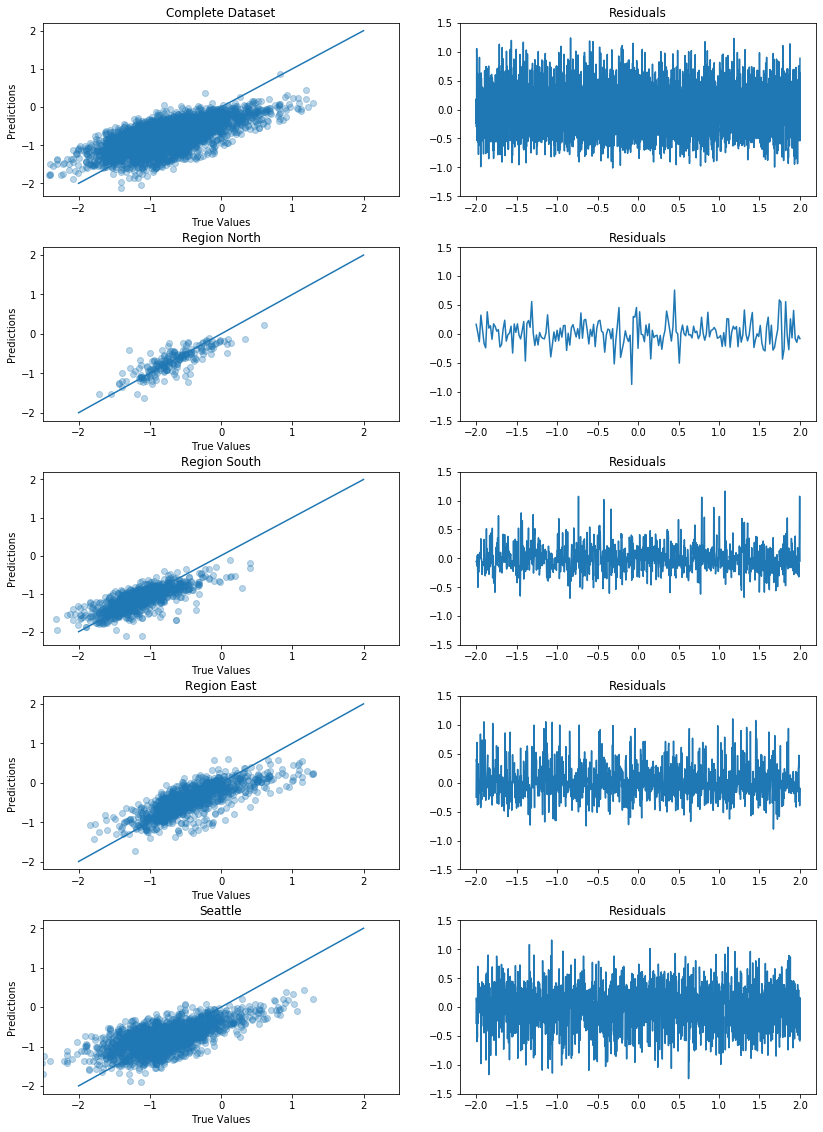

In [125]:
## The line / model + residuals
residuals_north_ln = y_north_ln_test - predictions_north_ln
residuals_south_ln = y_south_ln_test - predictions_south_ln
residuals_east_ln = y_east_ln_test - predictions_east_ln
residuals_seattle_ln = y_seattle_ln_test - predictions_seattle_ln

fig, ax = plt.subplots(5, 2,figsize=(12,16))
fig.tight_layout(pad=3.0)
ax[0,0].scatter(y_tot_ln_test, predictions_tot_ln, alpha=0.3)
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[0,0].plot(x,y)
ax[0,0].set_title("Complete Dataset")
ax[0,0].set_xlabel("True Values")
ax[0,0].set_ylabel("Predictions")
ax[0,0].set_xlim(-2.5,2.5)
x1 = np.linspace(-2,2,4305)
ax[0,1].plot(x1,residuals_tot_ln)
ax[0,1].set_ylim(-1.5,1.5)
ax[0,1].set_title("Residuals")

ax[1,0].scatter(y_north_ln_test, predictions_north_ln, alpha=0.3)
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[1,0].plot(x,y)
ax[1,0].set_title("Region North")
ax[1,0].set_xlabel("True Values")
ax[1,0].set_ylabel("Predictions")
ax[1,0].set_xlim(-2.5,2.5)
x1 = np.linspace(-2,2,205)
ax[1,1].plot(x1,residuals_north_ln)
ax[1,1].set_ylim(-1.5,1.5)
ax[1,1].set_title("Residuals")

ax[2,0].scatter(y_south_ln_test, predictions_south_ln, alpha=0.3)
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[2,0].plot(x,y)
ax[2,0].set_title("Region South")
ax[2,0].set_xlabel("True Values")
ax[2,0].set_ylabel("Predictions")
ax[2,0].set_xlim(-2.5,2.5)
x1 = np.linspace(-2,2,1102)
ax[2,1].plot(x1,residuals_south_ln)
ax[2,1].set_ylim(-1.5,1.5)
ax[2,1].set_title("Residuals")

ax[3,0].scatter(y_east_ln_test, predictions_east_ln, alpha=0.3)
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[3,0].plot(x,y)
ax[3,0].set_title("Region East")
ax[3,0].set_xlabel("True Values")
ax[3,0].set_ylabel("Predictions")
ax[3,0].set_xlim(-2.5,2.5)
x1 = np.linspace(-2,2,1210)
ax[3,1].plot(x1,residuals_east_ln)
ax[3,1].set_ylim(-1.5,1.5)
ax[3,1].set_title("Residuals")

ax[4,0].scatter(y_seattle_ln_test, predictions_seattle_ln, alpha=0.3)
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[4,0].plot(x,y)
ax[4,0].set_title("Seattle")
ax[4,0].set_xlabel("True Values")
ax[4,0].set_ylabel("Predictions")
ax[4,0].set_xlim(-2.5,2.5)
x1 = np.linspace(-2,2,1789)
ax[4,1].plot(x1,residuals_seattle_ln)
ax[4,1].set_ylim(-1.5,1.5)
ax[4,1].set_title("Residuals");
#plt.savefig('simple_linear_regression_eval.jpg', dpi=300)


* Look at the p-values for the test case

In [103]:
print("p-values for complete dataset:")
mod = sms.OLS(y_tot_ln_test,X_tot_ln_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values);

print("p-values for North:")
mod = sms.OLS(y_north_ln_test,X_north_ln_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

print("p-values for South:")
mod = sms.OLS(y_south_ln_test,X_south_ln_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

print("p-values for East:")
mod = sms.OLS(y_east_ln_test,X_east_ln_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

print("p-values for Seattle:")
mod = sms.OLS(y_seattle_ln_test,X_seattle_ln_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values);

p-values for complete dataset:
sqft_living    0.0
Name: P>|t|, dtype: float64
p-values for North:
sqft_living    2.729428e-61
Name: P>|t|, dtype: float64
p-values for South:
sqft_living    0.0
Name: P>|t|, dtype: float64
p-values for East:
sqft_living    1.231375e-138
Name: P>|t|, dtype: float64
p-values for Seattle:
sqft_living    0.0
Name: P>|t|, dtype: float64


Observations:
* All p-values are smaller than 0.05, that is the coefficients are statistically significant at al 95% level   

### How do the models perform?

* Look at R²

In [104]:
print("R^2 Total Dataset")
print("{:.2}".format(r2_score(y_tot_ln_test, predictions_tot_ln, sample_weight=None, multioutput='uniform_average')))
print("R^2 North")
print("{:.2}".format(r2_score(y_north_ln_test, predictions_north_ln, sample_weight=None, multioutput='uniform_average')))
print("R^2 South")
print("{:.2}".format(r2_score(y_south_ln_test, predictions_south_ln, sample_weight=None, multioutput='uniform_average')))
print("R^2 East")
print("{:.2}".format(r2_score(y_east_ln_test, predictions_east_ln, sample_weight=None, multioutput='uniform_average')))
print("R^2 Seattle")
print("{:.2}".format(r2_score(y_seattle_ln_test, predictions_seattle_ln, sample_weight=None, multioutput='uniform_average')))

R^2 Total Dataset
0.45
R^2 North
0.65
R^2 South
0.57
R^2 East
0.59
R^2 Seattle
0.42


* Look at the mean squared error

In [105]:
# mean squared error
print("MSE Total Dataset")
print("{:.2}".format(mean_squared_error(y_tot_ln_test, predictions_tot_ln)))
print("MSE North")
print("{:.2}".format(mean_squared_error(y_north_ln_test, predictions_north_ln)))
print("MSE South")
print("{:.2}".format(mean_squared_error(y_south_ln_test, predictions_south_ln)))
print("MSE East")
print("{:.2}".format(mean_squared_error(y_east_ln_test, predictions_east_ln)))
print("MSE Seattle")
print("{:.2}".format(mean_squared_error(y_seattle_ln_test, predictions_seattle_ln)))

MSE Total Dataset
0.15
MSE North
0.047
MSE South
0.056
MSE East
0.09
MSE Seattle
0.15


Observations:
    
* R² is higher for the single regions than for the total dataset
* R² has highest value for the region North and lowest for the region Seattle
* The mean squared error is analogue to R², lowest for the Region North, highest for Seattle
* Maybe for Seattle we have to look at different/more features

### How do the coefficients look like for each model?

In [106]:
print("Complete Dataset")
print("coefficient: {:.2}".format(model_tot_ln.coef_[0]))
print("intercept: {:.2}".format(model_tot_ln.intercept_))
print("North")
print("coefficient: {:.2}".format(model_north_ln.coef_[0]))
print("intercept: {:.2}".format(model_north_ln.intercept_))
print("South")
print("coefficient: {:.2}".format(model_south_ln.coef_[0]))
print("intercept: {:.2}".format(model_south_ln.intercept_))
print("East")
print("coefficient: {:.2}".format(model_east_ln.coef_[0]))
print("intercept: {:.2}".format(model_east_ln.intercept_))
print("Seattle")
print("coefficient: {:.2}".format(model_seattle_ln.coef_[0]))
print("intercept: {:.2}".format(model_seattle_ln.intercept_))

Complete Dataset
coefficient: 0.84
intercept: -7.1
North
coefficient: 0.81
intercept: -6.9
South
coefficient: 0.76
intercept: -6.9
East
coefficient: 0.9
intercept: -7.4
Seattle
coefficient: 0.81
intercept: -6.8


# Can the model be improved?

* Problem: most of the features that have high correlation with the price, also have high correlations with sqrt_living
* Test if the model improves its performans, when the variable grade is included
* grade has to be traded as a categorical variable

In [107]:
# which values does grade take
print(house_sales_df_cp["grade"].unique())
print(north_df["grade"].unique())
print(south_df["grade"].unique())
print(east_df["grade"].unique())
print(seattle_df["grade"].unique())

[ 7  6  8 11  9  5 10 12  4  3 13]
[ 6  7  8 10  9 11 12  5  4]
[ 7  8  6  9 10  5 11  4 12  3 13]
[ 8 11  7  9  5 10 12  6  4 13]
[ 7  9  8  6 10  5 12 11 13  4]


In [108]:
# set grade as categorical variable
grade_cat_tot = house_sales_df_cp["grade"].astype('category')
grade_dum_tot = pd.get_dummies(grade_cat_tot, drop_first=True)
grade_cat_north = north_df["grade"].astype('category')
grade_dum_north = pd.get_dummies(grade_cat_north, drop_first=True)
grade_cat_south = south_df["grade"].astype('category')
grade_dum_south = pd.get_dummies(grade_cat_south, drop_first=True)
grade_cat_east = east_df["grade"].astype('category')
grade_dum_east = pd.get_dummies(grade_cat_east, drop_first=True)
grade_cat_seattle = seattle_df["grade"].astype('category')
grade_dum_seattle = pd.get_dummies(grade_cat_seattle, drop_first=True)
# merge with dataframe
total_grade = pd.concat([house_sales_df_cp, grade_dum_tot], axis=1)
north_grade = pd.concat([north_df, grade_dum_north], axis=1)
south_grade = pd.concat([south_df, grade_dum_south], axis=1)
east_grade = pd.concat([east_df, grade_dum_east], axis=1)
seattle_grade = pd.concat([seattle_df, grade_dum_seattle], axis=1)

### Create sub dataframes, only with "grade" , "sqft_living" and "price" to analyse the correlations

In [109]:
tot_grade = total_grade[["price",4,5,6,7,8,9,10,11,12,13,"sqft_living"]]
no_grade = north_grade[["price",5,6,7,8,9,10,11,12,"sqft_living"]]
so_grade = south_grade[["price",4,5,6,7,8,9,10,11,12,13,"sqft_living"]]
ea_grade = east_grade[["price",5,6,7,8,9,10,11,12,13,"sqft_living"]]
se_grade = seattle_grade[["price",5,6,7,8,9,10,11,12,13,"sqft_living"]]

(21523, 12)

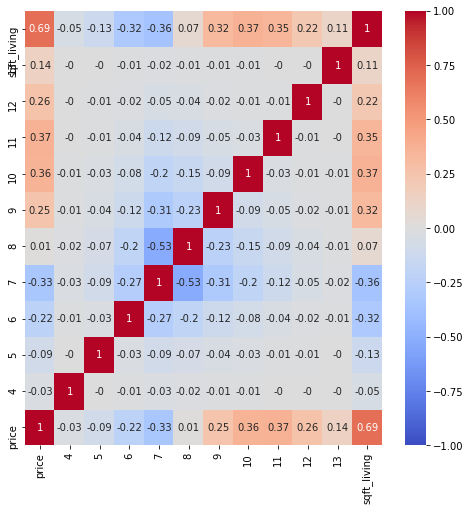

In [110]:
fig, ax = plt.subplots(figsize=(8,8))
#mask = np.triu(df_high_corr.corr())
ax = sns.heatmap(round(tot_grade.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,12))
tot_grade.shape

(1024, 10)

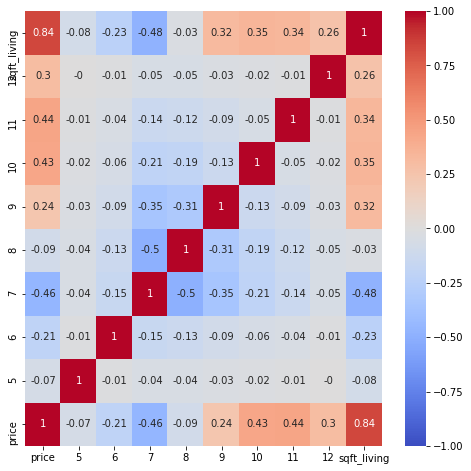

In [111]:
fig, ax = plt.subplots(figsize=(8,8))
#mask = np.triu(df_high_corr.corr())
ax = sns.heatmap(round(no_grade.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,10))
no_grade.shape

(5508, 12)

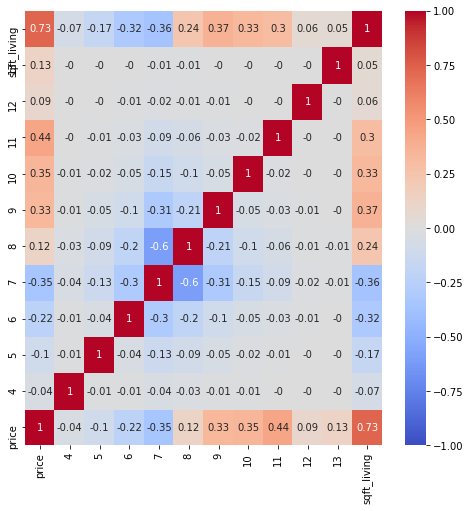

In [112]:
fig, ax = plt.subplots(figsize=(8,8))
#mask = np.triu(df_high_corr.corr())
ax = sns.heatmap(round(so_grade.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,12))
so_grade.shape

(6048, 11)

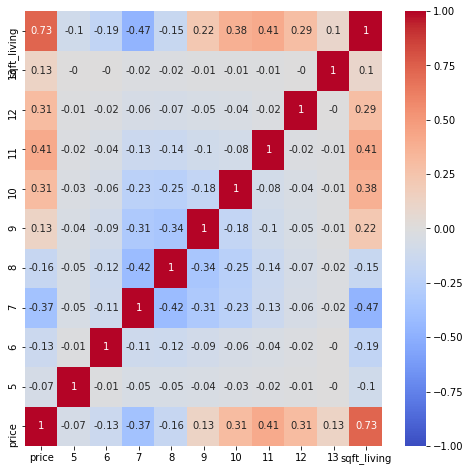

In [113]:
fig, ax = plt.subplots(figsize=(8,8))
#mask = np.triu(df_high_corr.corr())
ax = sns.heatmap(round(ea_grade.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,11))
ea_grade.shape

(8943, 14)

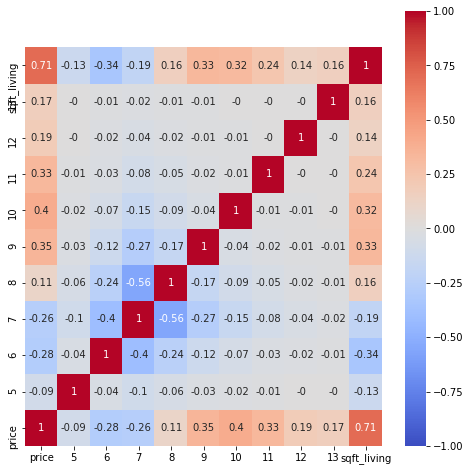

In [114]:
fig, ax = plt.subplots(figsize=(8,8))
#mask = np.triu(df_high_corr.corr())
ax = sns.heatmap(round(se_grade.corr(),2)
                 ,annot=True
                 #,mask=mask
                 ,cmap='coolwarm'
                 ,vmin=-1)
ax.set_ylim((0,12))
seattle_df.shape

### Add variables for grade to regression model

* Do not include all values, but only 7-12
* Tests showed that the model is not improved, when including more values for grade

In [115]:
# Complete Dataset
y = total_grade["price"]/1000000
ln_y = np.log(y)
#ln_X = np.log(X)
X1 = total_grade[["sqft_living"]]
X2 = total_grade[[7,8,9,10,11,12]]
ln_X1 = np.log(X1) 
X = pd.concat([ln_X1, X2], axis=1)
X_tot_grade_train, X_tot_grade_test, y_tot_grade_train, y_tot_grade_test = train_test_split(X, ln_y, test_size=0.2)
print("Train set length total (x,y)")
print(X_tot_grade_train.shape, y_tot_grade_train.shape)
print("Test set length total (x,y)")
print(X_tot_grade_test.shape, y_tot_grade_test.shape)

# North
y = north_grade["price"]/1000000
ln_y = np.log(y)
#ln_X = np.log(X)
X1 = north_grade[["sqft_living"]]
X2 = north_grade[[7,8,9,10,11,12]]
ln_X1 = np.log(X1) 
X = pd.concat([ln_X1, X2], axis=1)
X_north_grade_train, X_north_grade_test, y_north_grade_train, y_north_grade_test = train_test_split(X, ln_y, test_size=0.2)
print("Train set length North (x,y)")
print(X_north_grade_train.shape, y_north_grade_train.shape)
print("Test set length North (x,y)")
print(X_north_grade_test.shape, y_north_grade_test.shape)

# South
y = south_grade["price"]/1000000
ln_y = np.log(y)
#ln_X = np.log(X)
X1 = south_grade[["sqft_living"]]
X2 = south_grade[[7,8,9,10,11,12]]
ln_X1 = np.log(X1) 
X = pd.concat([ln_X1, X2], axis=1)
X_south_grade_train, X_south_grade_test, y_south_grade_train, y_south_grade_test = train_test_split(X, ln_y, test_size=0.2)
print("Train set length South (x,y)")
print(X_south_grade_train.shape, y_south_grade_train.shape)
print("Test set length South (x,y)")
print(X_south_grade_test.shape, y_south_grade_test.shape)

# East
y = east_grade["price"]/1000000
ln_y = np.log(y)
#ln_X = np.log(X)
X1 = east_grade[["sqft_living"]]
X2 = east_grade[[7,8,9,10,11,12]]
ln_X1 = np.log(X1) 
X = pd.concat([ln_X1, X2], axis=1)
X_east_grade_train, X_east_grade_test, y_east_grade_train, y_east_grade_test = train_test_split(X, ln_y, test_size=0.2)
print("Train set length East (x,y)")
print(X_east_grade_train.shape, y_east_grade_train.shape)
print("Test set length East (x,y)")
print(X_east_grade_test.shape, y_east_grade_test.shape)

# Seattle
y = seattle_grade["price"]/1000000
ln_y = np.log(y)
#ln_X = np.log(X)
X1 = seattle_grade[["sqft_living"]]
X2 = seattle_grade[[7,8,9,10,11,12]]
ln_X1 = np.log(X1) 
X = pd.concat([ln_X1, X2], axis=1)
X_seattle_grade_train, X_seattle_grade_test, y_seattle_grade_train, y_seattle_grade_test = train_test_split(X, ln_y, test_size=0.2)
print("Train set length Seattle (x,y)")
print(X_seattle_grade_train.shape, y_seattle_grade_train.shape)
print("Test set length Seattle (x,y)")
print(X_seattle_grade_test.shape, y_seattle_grade_test.shape)

Train set length total (x,y)
(17218, 7) (17218,)
Test set length total (x,y)
(4305, 7) (4305,)
Train set length North (x,y)
(819, 7) (819,)
Test set length North (x,y)
(205, 7) (205,)
Train set length South (x,y)
(4406, 7) (4406,)
Test set length South (x,y)
(1102, 7) (1102,)
Train set length East (x,y)
(4838, 7) (4838,)
Test set length East (x,y)
(1210, 7) (1210,)
Train set length Seattle (x,y)
(7154, 7) (7154,)
Test set length Seattle (x,y)
(1789, 7) (1789,)


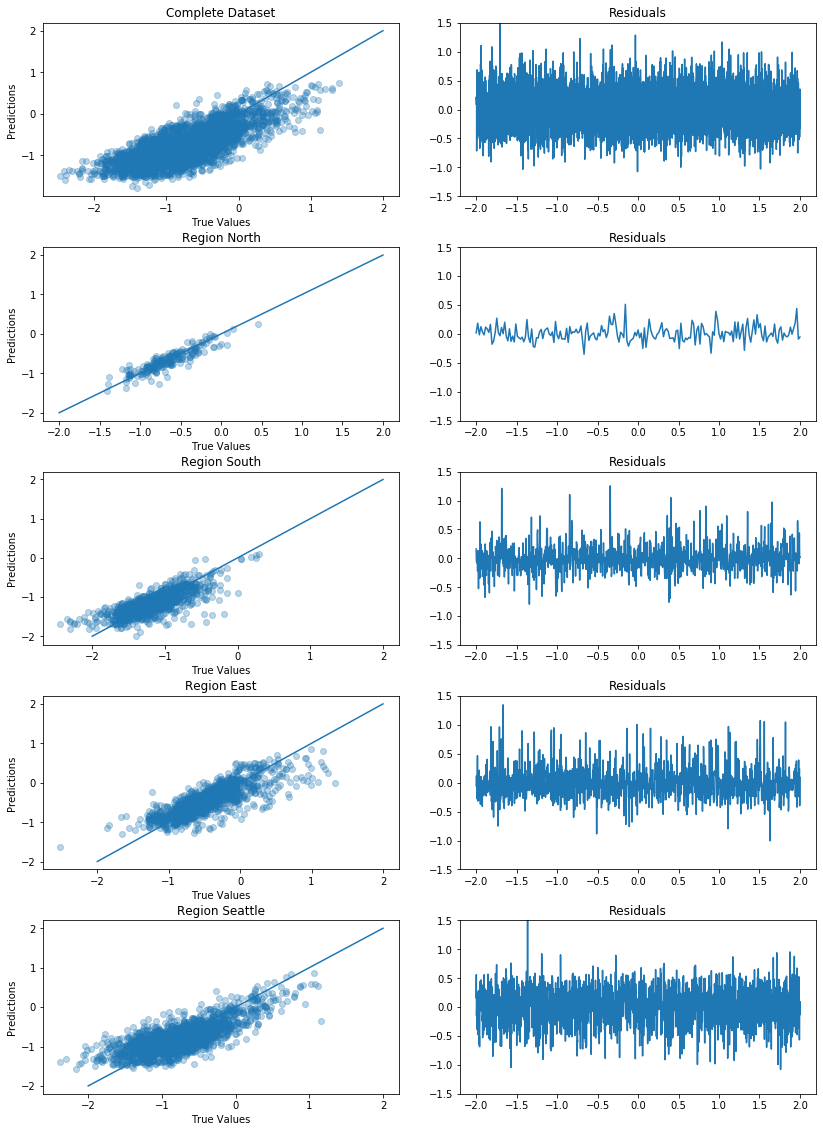

In [116]:
# fit a model
lm = linear_model.LinearRegression()
model_tot_grade = lm.fit(X_tot_grade_train, y_tot_grade_train)
predictions_tot_grade = lm.predict(X_tot_grade_test)

lm = linear_model.LinearRegression()
model_north_grade = lm.fit(X_north_grade_train, y_north_grade_train)
predictions_north_grade = lm.predict(X_north_grade_test)

lm = linear_model.LinearRegression()
model_south_grade = lm.fit(X_south_grade_train, y_south_grade_train)
predictions_south_grade = lm.predict(X_south_grade_test)

lm = linear_model.LinearRegression()
model_east_grade = lm.fit(X_east_grade_train, y_east_grade_train)
predictions_east_grade = lm.predict(X_east_grade_test)

lm = linear_model.LinearRegression()
model_seattle_grade = lm.fit(X_seattle_grade_train, y_seattle_grade_train)
predictions_seattle_grade = lm.predict(X_seattle_grade_test)

## The line / model
residuals_tot_grade = y_tot_grade_test - predictions_tot_grade
residuals_north_grade = y_north_grade_test - predictions_north_grade
residuals_south_grade = y_south_grade_test - predictions_south_grade
residuals_east_grade = y_east_grade_test - predictions_east_grade
residuals_seattle_grade = y_seattle_grade_test - predictions_seattle_grade

fig, ax = plt.subplots(5,2,figsize=(12,16))
fig.tight_layout(pad=3.0)
ax[0,0].scatter(y_tot_grade_test, predictions_tot_grade, alpha=0.3)
x = np.linspace(0,2,100)
y = np.linspace(0,2,100)
ax[0,0].plot(x,y)
ax[0,0].set_xlabel("True Values")
ax[0,0].set_ylabel("Predictions")
ax[0,0].set_title("Complete Dataset")

x1 = np.linspace(-2,2,4305)
ax[0,1].plot(x1,residuals_tot_grade)
ax[0,1].set_ylim(-1.5,1.5)
ax[0,1].set_title("Residuals")

ax[1,0].scatter(y_north_grade_test, predictions_north_grade, alpha=0.3)
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[1,0].plot(x,y)
ax[1,0].set_xlabel("True Values")
ax[1,0].set_ylabel("Predictions")
ax[1,0].set_title("Region North")

x1 = np.linspace(-2,2,205)
ax[1,1].plot(x1,residuals_north_grade)
ax[1,1].set_ylim(-1.5,1.5)
ax[1,1].set_title("Residuals")

ax[2,0].scatter(y_south_grade_test, predictions_south_grade, alpha=0.3)
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[2,0].plot(x,y)
ax[2,0].set_xlabel("True Values")
ax[2,0].set_ylabel("Predictions")
ax[2,0].set_title("Region South")

x1 = np.linspace(-2,2,1102)
ax[2,1].plot(x1,residuals_south_grade)
ax[2,1].set_ylim(-1.5,1.5)
ax[2,1].set_title("Residuals")

ax[3,0].scatter(y_east_grade_test, predictions_east_grade, alpha=0.3)
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[3,0].plot(x,y)
ax[3,0].set_xlabel("True Values")
ax[3,0].set_ylabel("Predictions")
ax[3,0].set_title("Region East")

x1 = np.linspace(-2,2,1210)
ax[3,1].plot(x1,residuals_east_grade)
ax[3,1].set_ylim(-1.5,1.5)
ax[3,1].set_title("Residuals")

ax[4,0].scatter(y_seattle_grade_test, predictions_seattle_grade, alpha=0.3)
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[4,0].plot(x,y)
ax[4,0].set_xlabel("True Values")
ax[4,0].set_ylabel("Predictions")
ax[4,0].set_title("Region Seattle")

x1 = np.linspace(-2,2,1789)
ax[4,1].plot(x1,residuals_seattle_grade)
ax[4,1].set_ylim(-1.5,1.5)
ax[4,1].set_title("Residuals");

#plt.savefig('multiple_linear_regression_eval.jpg', dpi=300)

look at the p-values for the test cases

In [117]:
#p-values
print("p-values for complete dataset:")
mod = sms.OLS(y_tot_grade_test,X_tot_grade_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

print("p-values for region North:")
mod = sms.OLS(y_north_grade_test,X_north_grade_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values);

print("p-values for region South:")
mod = sms.OLS(y_south_grade_test,X_south_grade_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

print("p-values for region East:")
mod = sms.OLS(y_east_grade_test,X_east_grade_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

print("p-values for region Seattle:")
mod = sms.OLS(y_seattle_grade_test,X_seattle_grade_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values);

p-values for complete dataset:
sqft_living     0.000000e+00
7               1.255432e-54
8              1.696880e-181
9              1.524520e-308
10              0.000000e+00
11             2.429478e-239
12             2.092230e-147
Name: P>|t|, dtype: float64
p-values for region North:
sqft_living    1.803810e-29
7              4.859375e-02
8              1.033544e-06
9              9.162260e-15
10             1.528271e-16
11             2.651169e-18
12                      NaN
Name: P>|t|, dtype: float64
p-values for region South:
sqft_living    0.000000e+00
7              6.954690e-20
8              5.147763e-66
9              1.102393e-89
10             3.257266e-62
11             1.752911e-54
12                      NaN
Name: P>|t|, dtype: float64
p-values for region East:
sqft_living    1.138459e-56
7              9.251474e-01
8              6.423308e-08
9              4.323079e-27
10             3.785401e-45
11             1.850601e-57
12             1.212137e-46
Name: P>|t|, d

/Users/frauke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1827: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/frauke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/frauke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/frauke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/frauke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Observations:
 
* p-values are all smaller than 0.05, that is the coefficients are statistically significant at a 95% level

### How does the model perform?

In [118]:
print("R^2 complete Dataset")
print("{:.2}".format(r2_score(y_tot_grade_test, predictions_tot_grade, sample_weight=None, multioutput='uniform_average')))
print("R^2 North")
print("{:.2}".format(r2_score(y_north_grade_test, predictions_north_grade, sample_weight=None, multioutput='uniform_average')))
print("R^2 South")
print("{:.2}".format(r2_score(y_south_grade_test, predictions_south_grade, sample_weight=None, multioutput='uniform_average')))
print("R^2 East")
print("{:.2}".format(r2_score(y_east_grade_test, predictions_east_grade, sample_weight=None, multioutput='uniform_average')))
print("R^2 Seattle")
print("{:.2}".format(r2_score(y_seattle_grade_test, predictions_seattle_grade, sample_weight=None, multioutput='uniform_average')))

R^2 complete Dataset
0.55
R^2 North
0.81
R^2 South
0.59
R^2 East
0.65
R^2 Seattle
0.57


In [119]:
# calculate R^2 adjusted
# number of observations
n = X.shape[0]
# number of features
p = X.shape[1]
R_squ_tot = r2_score(y_tot_grade_test, predictions_tot_grade, sample_weight=None, multioutput='uniform_average')
R_squ_ad = 1 - (1 - R_squ_tot)*(n-1)/(n-p-1)
print("R^2 adjusted complete Dataset")
print("{:.2}".format(R_squ_ad))
R_squ_north = r2_score(y_north_grade_test, predictions_north_grade, sample_weight=None, multioutput='uniform_average')
R_squ_ad = 1 - (1 - R_squ_north)*(n-1)/(n-p-1)
print("R^2 adjusted North")
print("{:.2}".format(R_squ_ad))
R_squ_south = r2_score(y_south_grade_test, predictions_south_grade, sample_weight=None, multioutput='uniform_average')
R_squ_ad = 1 - (1 - R_squ_south)*(n-1)/(n-p-1)
print("R^2 adjusted South")
print("{:.2}".format(R_squ_ad))
R_squ_east = r2_score(y_east_grade_test, predictions_east_grade, sample_weight=None, multioutput='uniform_average')
R_squ_ad = 1 - (1 - R_squ_east)*(n-1)/(n-p-1)
print("R^2 adjusted East")
print("{:.2}".format(R_squ_ad))
R_squ_seattle = r2_score(y_seattle_grade_test, predictions_seattle_grade, sample_weight=None, multioutput='uniform_average')
R_squ_ad = 1 - (1 - R_squ_seattle)*(n-1)/(n-p-1)
print("R^2 adjusted Seattle")
print("{:.2}".format(R_squ_ad))

R^2 adjusted complete Dataset
0.55
R^2 adjusted North
0.81
R^2 adjusted South
0.59
R^2 adjusted East
0.65
R^2 adjusted Seattle
0.57


In [120]:
# mean squared error
print("MSE complete Dataset")
print("{:.2}".format(mean_squared_error(y_tot_grade_test, predictions_tot_grade)))
print("MSE North")
print("{:.2}".format(mean_squared_error(y_north_grade_test, predictions_north_grade)))
print("MSE South")
print("{:.2}".format(mean_squared_error(y_south_grade_test, predictions_south_grade)))
print("MSE East")
print("{:.2}".format(mean_squared_error(y_east_grade_test, predictions_east_grade)))
print("MSE Seattle")
print("{:.2}".format(mean_squared_error(y_seattle_grade_test, predictions_seattle_grade)))

MSE complete Dataset
0.12
MSE North
0.018
MSE South
0.054
MSE East
0.075
MSE Seattle
0.11


Observation:

* R² has improved for all models
* No difference between R² and R² adjusted
* The mean squared error has improved (is smaller) than in the simple linear regression for all models

### How do the coefficients look like?

In [121]:
print("Complete Dataset")
print("coefficient:")
print(model_tot_grade.coef_)
print("intercept: {:.2}".format(model_tot_grade.intercept_))
print("North")
print("coefficient:")
print(model_north_grade.coef_)
print("intercept: {:.2}".format(model_north_grade.intercept_))
print("South")
print("coefficient:")
print(model_south_grade.coef_)
print("intercept: {:.2}".format(model_south_ln.intercept_))
print("East")
print("coefficient:")
print(model_east_grade.coef_)
print("intercept: {:.2}".format(model_east_ln.intercept_))
print("Seattle")
print("coefficient:")
print(model_seattle_grade.coef_)
print("intercept: {:.2}".format(model_seattle_ln.intercept_))

Complete Dataset
coefficient:
[0.45290106 0.14019195 0.32271355 0.5448599  0.75876256 0.99687755
 1.18332105]
intercept: -4.5
North
coefficient:
[0.49101211 0.14605024 0.24582402 0.36133605 0.59002581 0.70148414
 0.87704843]
intercept: -4.7
South
coefficient:
[0.52795634 0.037593   0.14391668 0.3235784  0.51663825 0.82319732
 0.84234865]
intercept: -6.9
East
coefficient:
[0.58241357 0.05761423 0.17182657 0.30369899 0.43795734 0.65906768
 0.81051068]
intercept: -7.4
Seattle
coefficient:
[0.47608274 0.19096362 0.38894612 0.67207893 0.93064528 1.13636744
 1.31541241]
intercept: -6.8


# Visualisation

### Simple linear regression (only depending on sqft_living)

* Compare the model resulting from the complete dataset with the models resulting from each region
* Use the model resulting from the complete dataset to predict the house prices for each of the region 

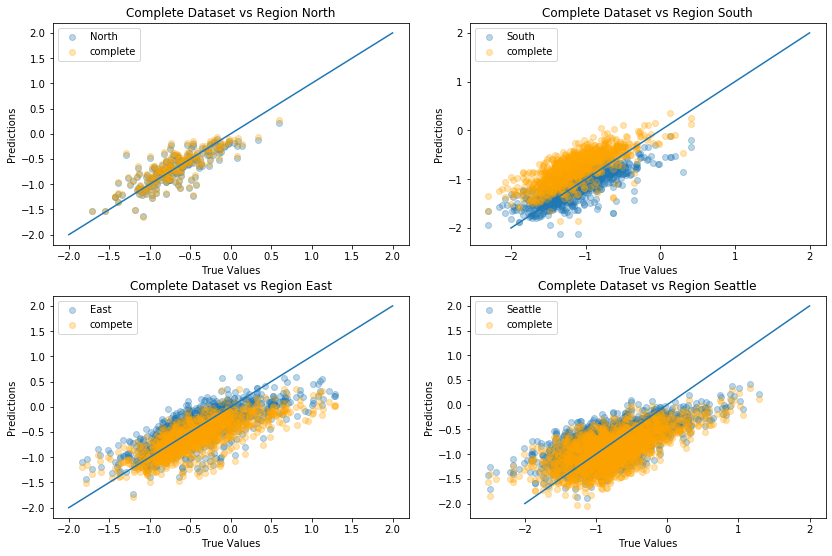

In [122]:
# plot prediction of each region vs the model using the entire dataset


# coefficients and intercepts for the different regions:
# complete dataset
lr_tot_co = model_tot_ln.coef_[0]
lr_tot_int = model_tot_ln.intercept_
# North
lr_north_co = model_north_ln.coef_[0]
lr_north_int = model_north_ln.intercept_
# South
lr_south_co = model_south_ln.coef_[0]
lr_south_int = model_south_ln.intercept_
# East
lr_east_co = model_east_ln.coef_[0]
lr_east_int = model_east_ln.intercept_
# Seattle
lr_seattle_co = model_seattle_ln.coef_[0]
lr_seattle_int = model_seattle_ln.intercept_

# plot for complete dataset: y_test, predictions from simple linear regression, predictions from simple linear regression using the other region for testing

predictions_tot_north = lr_tot_co*X_north_ln_test + lr_tot_int
predictions_tot_south = lr_tot_co*X_south_ln_test + lr_tot_int
predictions_tot_east = lr_tot_co*X_east_ln_test + lr_tot_int
predictions_tot_seattle = lr_tot_co*X_seattle_ln_test + lr_tot_int

color=["#1f77b4","orange"]

fig, ax = plt.subplots(2,2,figsize=(12,8))
fig.tight_layout(pad=3.0)
ax[0,0].scatter(y_north_ln_test, predictions_north_ln, alpha = 0.3, label="North", c=color[0])
ax[0,0].scatter(y_north_ln_test, predictions_tot_north, alpha = 0.3, label="complete", c=color[1])
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[0,0].plot(x, y, c=color[0])
ax[0,0].legend()
ax[0,0].set_xlabel("True Values")
ax[0,0].set_ylabel("Predictions")
ax[0,0].set_title("Complete Dataset vs Region North")

ax[0,1].scatter(y_south_ln_test, predictions_south_ln, alpha = 0.3, label="South", c=color[0])
ax[0,1].scatter(y_south_ln_test, predictions_tot_south, alpha = 0.3, label="complete", c=color[1])
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[0,1].plot(x, y, c=color[0])
ax[0,1].legend()
ax[0,1].set_xlabel("True Values")
ax[0,1].set_ylabel("Predictions")
ax[0,1].set_title("Complete Dataset vs Region South")

ax[1,0].scatter(y_east_ln_test, predictions_east_ln, alpha = 0.3, label="East", c=color[0])
ax[1,0].scatter(y_east_ln_test, predictions_tot_east, alpha = 0.3, label="compete", c=color[1])
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[1,0].plot(x, y ,c=color[0])
ax[1,0].legend()
ax[1,0].set_xlabel("True Values")
ax[1,0].set_ylabel("Predictions")
ax[1,0].set_title("Complete Dataset vs Region East")

ax[1,1].scatter(y_seattle_ln_test, predictions_seattle_ln, alpha = 0.3, label="Seattle", c=color[0])
ax[1,1].scatter(y_seattle_ln_test, predictions_tot_seattle, alpha = 0.3, label="complete", c=color[1])
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
ax[1,1].plot(x, y, c=color[0])
ax[1,1].legend()
ax[1,1].set_xlabel("True Values")
ax[1,1].set_ylabel("Predictions")
ax[1,1].set_title("Complete Dataset vs Region Seattle");

#plt.savefig('simple_linear_regression_eval_regModels.jpg', dpi=300)

### Multiple linear regression (sqft_living, grade)

* Compare the model resulting from the complete dataset with the models resulting from each region
* Use the model resulting from the complete dataset to predict the house prices for each of the region 

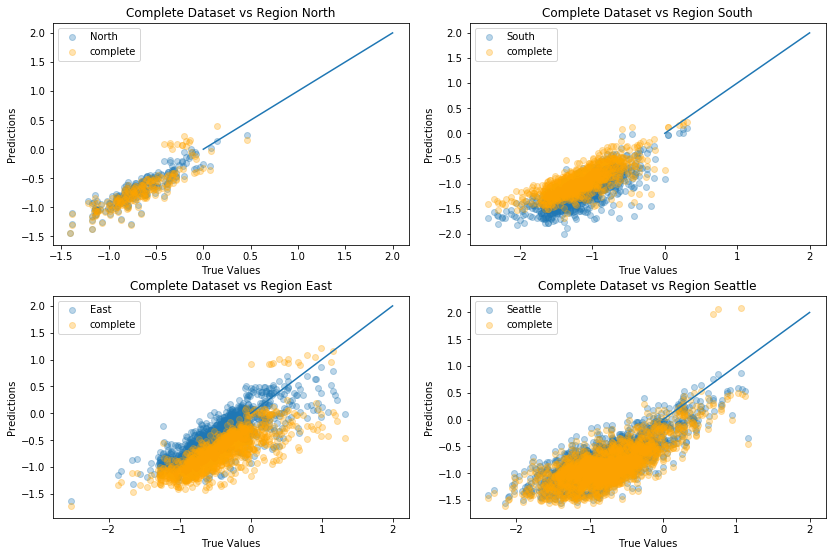

In [124]:
# plot prediction of each region vs the model using the entire dataset

# coefficients and intercepts for the different regions:
# complete dataset
lr_tot_co = model_tot_grade.coef_
lr_tot_int = model_tot_grade.intercept_
# North
lr_north_co = model_north_grade.coef_
lr_north_int = model_north_grade.intercept_
# South
lr_south_co = model_south_grade.coef_
lr_south_int = model_south_grade.intercept_
# East
lr_east_co = model_east_grade.coef_
lr_east_int = model_east_grade.intercept_
# Seattle
lr_seattle_co = model_seattle_grade.coef_
lr_seattle_int = model_seattle_grade.intercept_


# plot for complete dataset: y_test, predictions from simple linear regression, predictions from simple linear regression using the other region for testing

predictions_tot_north_mr = lr_tot_co[0]*X_north_grade_test.iloc[:,0]+lr_north_co[1]*X_north_grade_test.iloc[:,1]+lr_north_co[2]*X_north_grade_test.iloc[:,2]+lr_north_co[3]*X_north_grade_test.iloc[:,3]+lr_seattle_co[4]*X_north_grade_test.iloc[:,4]+lr_north_co[5]*X_north_grade_test.iloc[:,5]+lr_north_co[6]*X_north_grade_test.iloc[:,6]+lr_north_co[6]*X_north_grade_test.iloc[:,6]+lr_tot_int
predictions_tot_south_mr = lr_tot_co[0]*X_south_grade_test.iloc[:,0]+lr_south_co[1]*X_south_grade_test.iloc[:,1]+lr_south_co[2]*X_south_grade_test.iloc[:,2]+lr_south_co[3]*X_south_grade_test.iloc[:,3]+lr_south_co[4]*X_south_grade_test.iloc[:,4]+lr_south_co[5]*X_south_grade_test.iloc[:,5]+lr_south_co[6]*X_south_grade_test.iloc[:,6]+lr_south_co[6]*X_south_grade_test.iloc[:,6]+lr_tot_int
predictions_tot_east_mr = lr_tot_co[0]*X_east_grade_test.iloc[:,0]+lr_east_co[1]*X_east_grade_test.iloc[:,1]+lr_east_co[2]*X_east_grade_test.iloc[:,2]+lr_east_co[3]*X_east_grade_test.iloc[:,3]+lr_east_co[4]*X_east_grade_test.iloc[:,4]+lr_east_co[5]*X_east_grade_test.iloc[:,5]+lr_east_co[6]*X_east_grade_test.iloc[:,6]+lr_east_co[6]*X_east_grade_test.iloc[:,6]+ lr_tot_int
predictions_tot_seattle_mr = lr_tot_co[0]*X_seattle_grade_test.iloc[:,0]+lr_seattle_co[1]*X_seattle_grade_test.iloc[:,1]+lr_seattle_co[2]*X_seattle_grade_test.iloc[:,2]+lr_seattle_co[3]*X_seattle_grade_test.iloc[:,3]+lr_seattle_co[4]*X_seattle_grade_test.iloc[:,4]+lr_seattle_co[5]*X_seattle_grade_test.iloc[:,5]+lr_seattle_co[6]*X_seattle_grade_test.iloc[:,6]+lr_seattle_co[6]*X_seattle_grade_test.iloc[:,6]+lr_tot_int
predictions_tot_tot_mr = lr_tot_co[0]*X_tot_grade_test.iloc[:,0]+lr_tot_co[1]*X_tot_grade_test.iloc[:,1]+lr_tot_co[2]*X_tot_grade_test.iloc[:,2]+lr_tot_co[3]*X_tot_grade_test.iloc[:,3]+lr_tot_co[4]*X_tot_grade_test.iloc[:,4]+lr_tot_co[5]*X_tot_grade_test.iloc[:,5]+lr_tot_co[6]*X_tot_grade_test.iloc[:,6]+lr_tot_co[6]*X_tot_grade_test.iloc[:,6]+lr_tot_int

color=["#1f77b4","orange"]

fig, ax = plt.subplots(2,2,figsize=(12,8))
fig.tight_layout(pad=3.0)
ax[0,0].scatter(y_north_grade_test, predictions_north_grade, alpha = 0.3, label="North", c=color[0])
ax[0,0].scatter(y_north_grade_test, predictions_tot_north_mr, alpha = 0.3, label="complete", c=color[1])
x = np.linspace(0,2,100)
y = np.linspace(0,2,100)
ax[0,0].plot(x,y)
ax[0,0].legend()
ax[0,0].set_xlabel("True Values")
ax[0,0].set_ylabel("Predictions")
ax[0,0].set_title("Complete Dataset vs Region North")

ax[0,1].scatter(y_south_grade_test, predictions_south_grade, alpha = 0.3, label="South", c=color[0])
ax[0,1].scatter(y_south_grade_test, predictions_tot_south_mr, alpha = 0.3, label="complete", c=color[1])
x = np.linspace(0,2,100)
y = np.linspace(0,2,100)
ax[0,1].plot(x,y)
ax[0,1].legend()
ax[0,1].set_xlabel("True Values")
ax[0,1].set_ylabel("Predictions")
ax[0,1].set_title("Complete Dataset vs Region South")

ax[1,0].scatter(y_east_grade_test, predictions_east_grade, alpha = 0.3, label="East", c=color[0])
ax[1,0].scatter(y_east_grade_test, predictions_tot_east_mr, alpha = 0.3, label="complete", c=color[1])
x = np.linspace(0,2,100)
y = np.linspace(0,2,100)
ax[1,0].plot(x,y)
ax[1,0].legend()
ax[1,0].set_xlabel("True Values")
ax[1,0].set_ylabel("Predictions")
ax[1,0].set_title("Complete Dataset vs Region East")

ax[1,1].scatter(y_seattle_grade_test, predictions_seattle_grade, alpha = 0.3, label="Seattle", c=color[0])
ax[1,1].scatter(y_seattle_grade_test, predictions_tot_seattle_mr, alpha = 0.3, label="complete", c=color[1])
x = np.linspace(0,2,100)
y = np.linspace(0,2,100)
ax[1,1].plot(x,y)
ax[1,1].legend()
ax[1,1].set_xlabel("True Values")
ax[1,1].set_ylabel("Predictions")
ax[1,1].set_title("Complete Dataset vs Region Seattle");

#plt.savefig('multiple_linear_regression_eval_regModels.jpg', dpi=300)

# Conclusions

* The features used in the models for the different regions are the same
* Coefficients differ depending on the region
* Multiple linear regression including "grade" improves the model for all regions (measured in R² and mse)
* The simple linear regression (with logarithmic transformation) shows already quite good performance (especially for the region North)
* Considering the simple linear regression (with feature sqft_living), no big difference can be observed compared to the performance of the model based on the complete dataset
* Considering the multiple linear regression (with feature sqft_living and grade), the performance of the model adjusted for each region seems to be better for the South and the East
* Note: Keep in mind the different sizes of the dataset for each region! Most data is from Seattle

# Outlook

* Repeat the analysis with datasets of the same size
* Analyse other features to improve the model
* Analyse possible non-linear dependencies
* Include more features not available from the dataset, which are important for each region (e.g. shopping centers nearby, climate,...)
* Review the regions, are there better criterias for the division 
* Analyse the city of Seattle in more detail. Maybe the model is depending on the district and coefficients and/or features should be adjusted for different districts
